In [378]:
import pandas as pd
import numpy as np
import random 
import statistics 
from decimal import Decimal


import matplotlib.pyplot as plt

In [379]:
def Random_FCFS(N, servicerate_1, arrival_rate_1, servicerate_2, arrival_rate_2, gamma, termination):
    # Setting paramters
    Queue = 0 
    Queue_name = []
    TNOW = 0
    Q_num = 0
    free_servers = []
    Abandon = 0
    Abandon_1 = 0
    Abandon_2 = 0 
    N_served = 0
    N_served_1 = 0
    N_served_2 = 0
    # Total numbef of people in a system for any given time 
    TotalP= 0
    AreaP = 0
    AreaQ_rate = 0
    AreaQ = 0
    
    # Overall people enter the system
    Total = 0


    # PLotting Parameters for experiment 
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0

    Waiting_Time_Left_1 = 0
    Waiting_Time_Served_1 = 0


    Waiting_number_Served_1 = 0
    Waiting_number_Served_2 = 0
    
    Waiting_Time_Left_2 = 0
    Waiting_Time_Served_2 = 0
    
     # Waiting time performance measure 
    Arrival_times = {}
    
    
    # Setting up the event Calendar 
    col_name = ["Arrival_1", "Arrival_2", "Termination"]

    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        

    
    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrival_1"] = random.expovariate(arrival_rate_1)
    event_calendar["Arrival_2"] = random.expovariate(arrival_rate_2)
    event_calendar["Termination"] = termination

 
    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    Utilization_1 =  { s : 0 for s in free_servers}
    Utilization_2 =  { s : 0 for s in free_servers}
    
    while TNOW < termination:      
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event]
        
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaP += TotalP*(termination - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(termination - TLast)
        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaP += TotalP*(TNOW - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(TNOW - TLast)
            

        if (Next_Event).startswith("Arrival") == True:
            TotalP += 1
            Total +=1
            if Next_Event == "Arrival_1":
                event_calendar["Arrival_1"] += random.expovariate(arrival_rate_1)
            else:
                event_calendar["Arrival_2"] += random.expovariate(arrival_rate_2)
            
            # Assign a queue to check if servers are free
            if free_servers == []:
                Queue += 1
                Q_num += 1
                
                if Next_Event == "Arrival_1":
                    Queue_name.append(str(Q_num)+ "_1")
                    event_calendar["Departure_" + str(Q_num)+ "_1"] = TNOW + random.expovariate(gamma)
                    Arrival_times[str(Q_num)+ "_1"] = TNOW
                else:
                    Queue_name.append(str(Q_num)+ "_2")
                    event_calendar["Departure_" + str(Q_num)+ "_2"] = TNOW + random.expovariate(gamma)
                    Arrival_times[str(Q_num)+ "_2"] = TNOW   
                
            else:
                s = random.choice(free_servers)
                free_servers.remove(s)
                N_served +=1
                
                # Split the stats
                if Next_Event == "Arrival_1":
                    N_served_1 +=1
                    event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                    if TNOW < termination:
                        if event_calendar[s] < termination:
                            Utilization_1[s] += event_calendar[s] - TNOW      
                        else:
                            Utilization_1[s] += termination - TNOW
                else:
                    N_served_2 +=1
                    event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                    if event_calendar[s] < termination:
                        Utilization_2[s] += event_calendar[s] - TNOW      
                    else:
                        Utilization_2[s] += termination - TNOW
                                   
               
                # Only schedule the next service if TNOW < termination
                if TNOW < termination:
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW      
                    else:
                        Total_Utilization[s] += termination - TNOW
                        
                        
                
        elif (Next_Event).startswith("Server") == True:
            TotalP -= 1
            ## Reset the value for the corresponding agent that is now free 
            event_calendar[Next_Event] = termination + 1 
            free_servers.append(Next_Event)
            
             # Schedule the next service time once a server is available 
            if Queue > 0 and free_servers != []:
                N_served +=1
                s = random.choice(free_servers)
                Queue -= 1 
                free_servers.remove(s)
                if Queue_name[0].endswith("1"):
                    event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                else:
                    event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                
                # First come first serve basis
                ## Make sure this is editing as required
                del event_calendar["Departure_" + Queue_name[0]]
                
                
                # Splitting the results per product for analysis 
                if Queue_name[0].endswith("_1") == True:
                    N_served_1 +=1
                    Waiting_number_Served_1 += 1 
                    if TNOW < termination:
                        Waiting_Time_Served_1 += TNOW - Arrival_times[Queue_name[0]]
                        if event_calendar[s] < termination:
                            Utilization_1[s] += event_calendar[s] - TNOW   
                        else:
                            Utilization_1[s] += termination - TNOW  
                    else:
                        Waiting_Time_Served_1 +=  termination - Arrival_times[Queue_name[0]]
                    
                else:
                    N_served_2 +=1
                    Waiting_number_Served_2 += 1 
                    if TNOW < termination:
                        Waiting_Time_Served_2 += TNOW - Arrival_times[Queue_name[0]]
                        if event_calendar[s] < termination:
                            Utilization_2[s] += event_calendar[s] - TNOW   
                        else:
                            Utilization_2[s] += termination - TNOW  
                    else:
                        Waiting_Time_Served_2 +=  termination - Arrival_times[Queue_name[0]]
                    
                
                # Overall Stats    
                if TNOW < termination:
                    Waiting_Time_Served += TNOW - Arrival_times[Queue_name[0]]
                    
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW  
                else:
                    Waiting_Time_Served +=  termination - Arrival_times[Queue_name[0]]
                    
                    
                Waiting_number_Served += 1 
                del Arrival_times[Queue_name[0]]
                Queue_name.remove(Queue_name[0])
                if Queue > 0 and free_servers != []:
                    print("ISSSUEEEEE HERE") 
    
        if (Next_Event).startswith("Departure") == True:
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            
            if Next_Event.endswith("_1") == True:
                Abandon_1 +=1
                if TNOW < termination:
                    Waiting_Time_Left_1 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
                else:
                    Waiting_Time_Left_1 += termination - Arrival_times[Next_Event[Next_Event.index("u")+4:]]  
            else:
                Abandon_2 +=1
                if TNOW < termination:
                    Waiting_Time_Left_2 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
                else:
                    Waiting_Time_Left_2 += termination - Arrival_times[Next_Event[Next_Event.index("u")+4:]]  
                
            
            if TNOW < termination:
                Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            else:
                Waiting_Time_Left += termination - Arrival_times[Next_Event[Next_Event.index("u")+4:]]          
            
            ## Remove entry,no need to record NEED TPO APPEND APPLY THE SAME 
            Waiting_number_Left += 1 
            del event_calendar[Next_Event]
            Queue_name.remove(Next_Event[Next_Event.index("u")+4:])
            del Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            
        
    val = 0
    for k in Total_Utilization:
        val +=  Total_Utilization[k]
    avg_u = val/len(Total_Utilization)/termination
        
        
    val = 0
    for k in Utilization_1:
        val +=  Utilization_1[k]
    avg_u_1 = val/len(Utilization_1)/termination
        
        
    val = 0
    for k in Utilization_2:
        val +=  Utilization_2[k]
        avg_u_2 = val/len(Utilization_2)/termination
    
    if Abandon == 0:
        Waiting_T_A = Waiting_Time_Left/1
    else:
        Waiting_T_A = Waiting_Time_Left/Abandon
        
    if Abandon_1 == 0:
        Waiting_T_A_1 =  Waiting_Time_Left_1/1
    else:
        Waiting_T_A_1 =  Waiting_Time_Left_1/Abandon_1
    
    if Abandon_2 == 0:
        Waiting_T_A_2 =  Waiting_Time_Left_2/1
    else:
        Waiting_T_A_2 =  Waiting_Time_Left_2/Abandon_2
        
    totalservicerate = 0
    for k in servicerate_1:
        totalservicerate +=  servicerate_1[k]
    avgservicerate_1 = totalservicerate/len(servicerate_1)
        
    totalservicerate = 0
    for k in servicerate_2:
        totalservicerate +=  servicerate_2[k]
    avgservicerate_2 = totalservicerate/len(servicerate_2)
    
    totalservicerate = 0
    for k in servicerate_2:
        totalservicerate +=  servicerate_1[k]+servicerate_2[k]
    avgservicerate= totalservicerate/2*len(servicerate_2)
    
    totalservicerate =0
    for k in servicerate_1:
        totalservicerate +=  (Utilization_1[k]/termination*servicerate_1[k]) + (Utilization_2[k]/termination*servicerate_2[k])
    
    return Abandon, Q_num, Waiting_T_A, Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaQ_rate/termination, Total, Total_Utilization,totalservicerate, N_served_1, N_served_2, Abandon_1, Abandon_2 

In [380]:
# Check order for S state to be the same 
def Edit_Entry(x):
    new_entry = {}
    new_entry.update( Served = x[4])
    new_entry.update( Served_1 = x[-4])
    new_entry.update( Served_2 = x[-3])
    new_entry.update( Waited = x[1])
    new_entry.update( Abandoned = x[0])
    new_entry.update( Abandoned_1 = x[-2])
    new_entry.update( Abandoned_2 = x[-1])
    new_entry.update( Waiting_Time_S = x[3])
    new_entry.update( Waiting_Time_A = x[2])
    new_entry.update( Utilization = x[5])
    new_entry.update( Avg_People = x[7])
    new_entry.update( Avg_QUEUE = x[6])
    return new_entry

In [381]:
V_homo_list = []
V_hetero_list = []
matrix_FCFS_R = pd.DataFrame ()
matrix_FCFS_R_homo = pd.DataFrame ()


new_entry = {}



free_servers = []
for i in range(0, 100): 
    free_servers += ["Server_"+str(i)]  

servicerate_1_1 = {}
servicerate_2_2 = {}

for i in range(0,20):
    
    sr_2 = 0
    sr_1 = 0
    
    servicerate_1 = {}
    for server in free_servers:
        servicerate_1.update({ server : random.uniform(0,2)})
        sr_1 += servicerate_1[server] 
        
    servicerate_2 = {}
    for server in free_servers:
        servicerate_2.update({ server : random.uniform(0,2)})
        sr_2 += servicerate_2[server]
    
    sr_1 = sr_1/100
    sr_2 = sr_2/100
    print(sr_1)
    print(sr_2)
    
    for s in free_servers:
        servicerate_h_1[s] = sr_1
        servicerate_h_2[s] = sr_2

    
    x = Random_FCFS(100, servicerate_1, 50, servicerate_2, 50, 0.5, 20000)
    new_entry = Edit_Entry(x)
    matrix_FCFS_R = matrix_FCFS_R.append(new_entry, ignore_index = True)
    
    print("This is complete")
    
    y = Random_FCFS(100, servicerate_h_1, 50, servicerate_h_2, 50, 0.5, 20000)
    new_entry = Edit_Entry(y)
    matrix_FCFS_R_homo = matrix_FCFS_R_homo.append(new_entry, ignore_index = True)

    
    print(i)

1.0188247313770606
1.0641262551634108
This is complete
0
0.9649030910933563
1.0893371730366805
This is complete
1
0.9273176598825568
0.9527818485903772
This is complete
2
1.0758364590991236
1.0626262059647802
This is complete
3
0.9841363144107903
1.0264063643358359
This is complete
4
0.9053377210797806
1.0284800722728362
This is complete
5
1.0809584175027585
0.9509427350703545
This is complete
6
1.0503118020648041
0.9265563694504115
This is complete
7
1.02078380730537
0.973986582088267
This is complete
8
0.9517460135665842
1.109857228897999
This is complete
9
1.0353784484213762
0.9024975717249885
This is complete
10
1.0214390449596857
1.048840110329059
This is complete
11
1.0098689078310579
1.0132916449662661
This is complete
12
1.1649933894505622
0.9960583974798716
This is complete
13
0.9662438354911633
0.9562540558058178
This is complete
14
0.9040836494036806
0.9762631004304293
This is complete
15
1.0345807819784807
0.9672263011494436
This is complete
16
1.0444711195216474
0.94570712

In [403]:
compare = [matrix_FCFS_R,matrix_FCFS_R_homo]
col_name = ["Measure", "Mean", "Variance", "Type"]
T = [ "Heterogeneous", "Homogeneous"]
m = pd.DataFrame (columns = col_name)
new_entry = { c : 0 for c in col_name}
b = 0
for c in compare:
    for key in ['Abandoned', 
       'Served', 'Utilization', 'Waited',
       'Waiting_Time_A', 'Waiting_Time_S']:
        new_entry.update(Type = T[b])
        new_entry.update( Measure = key)
        new_entry.update( Mean =  round(c[key].mean(), 3))
        new_entry.update( Variance =  statistics.variance((c[key])))
        intervl = scipy.stats.t.ppf(q=.975,df=19)*np.sqrt(statistics.variance(c[key]))/np.sqrt(20)
        new_entry.update( ConfidenceInterval = "("+str(round(c[key].mean() - intervl, 5))+ ","+ str(round(c[key].mean() + intervl, 5))+")")
        m = m.append(new_entry, ignore_index = True)
    b+=1

In [404]:
c.columns

Index(['Abandoned', 'Abandoned_1', 'Abandoned_2', 'Avg_People', 'Avg_QUEUE',
       'Served', 'Served_1', 'Served_2', 'Utilization', 'Waited',
       'Waiting_Time_A', 'Waiting_Time_S', 'Type'],
      dtype='object')

In [406]:
m.sort_values(["Measure"])[["Measure", "Type", "Mean", "Variance", "ConfidenceInterval"]]

,Measure,Type,Mean,Variance,ConfidenceInterval
0,Abandoned,Heterogeneous,359592.500,6.417325e+09,"(322100.70498,397084.29502)"
6,Abandoned,Homogeneous,72777.950,1.243398e+09,"(56274.89702,89281.00298)"
1,Served,Heterogeneous,1640750.200,6.408192e+09,"(1603285.09376,1678215.30624)"
7,Served,Homogeneous,1926545.900,1.219766e+09,"(1910200.42664,1942891.37336)"
2,Utilization,Heterogeneous,0.999,5.848922e-07,"(0.99908,0.9998)"
8,Utilization,Homogeneous,0.964,3.808844e-04,"(0.95532,0.97359)"
3,Waited,Heterogeneous,1978355.900,8.760505e+08,"(1964503.53904,1992208.26096)"
9,Waited,Homogeneous,1190868.400,1.041091e+11,"(1039859.17381,1341877.62619)"
4,Waiting_Time_A,Heterogeneous,0.223,1.610866e-03,"(0.20386,0.24143)"
10,Waiting_Time_A,Homogeneous,0.091,2.913066e-04,"(0.08275,0.09872)"


In [387]:
V_Heterogeneous = matrix_FCFS_R
V_Homogeneous = matrix_FCFS_R_homo

In [388]:
V_Homogeneous["Type"]  = 'Homogeneous'
V_Heterogeneous["Type"]  = 'Heterogeneous'

In [389]:
H_v = pd.DataFrame()
H_v = H_v.append(V_Homogeneous, ignore_index = True)
H_v = H_v.append(V_Heterogeneous, ignore_index = True)

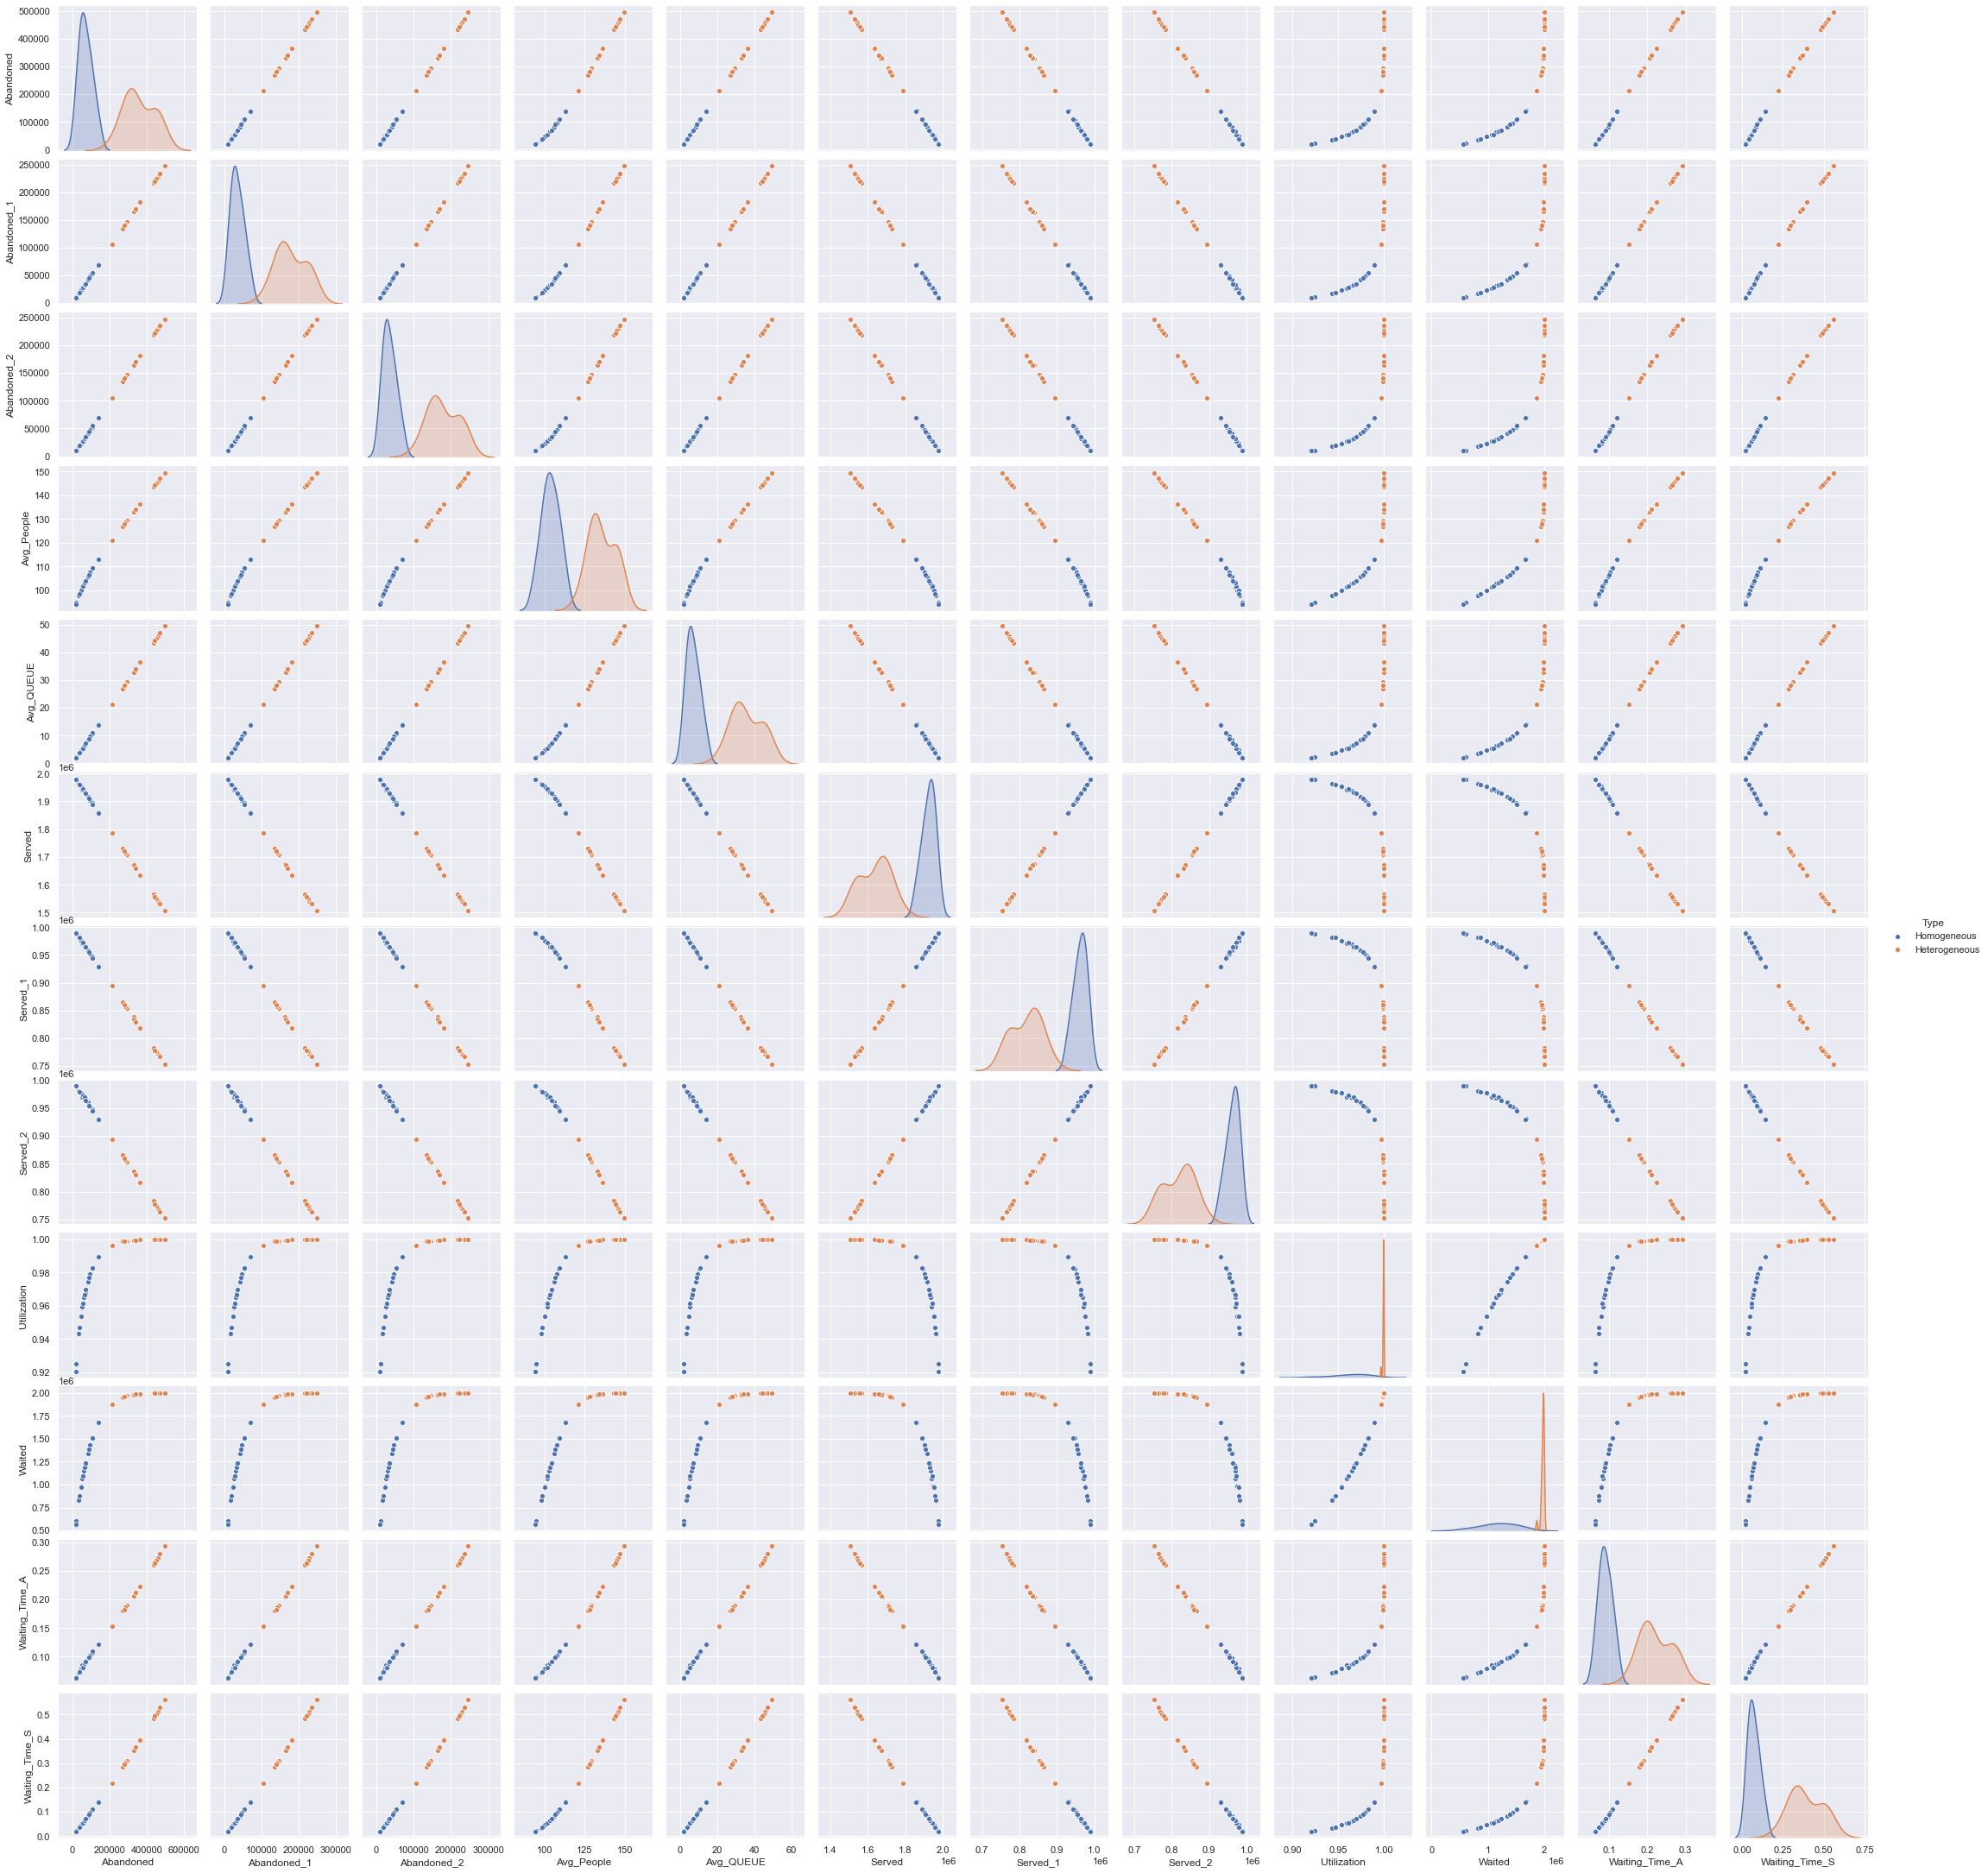

In [390]:
sns.pairplot(H_v, hue="Type")

In [407]:
H_v["Average Queue"] = H_v["Avg_QUEUE"] 
H_v["Average People"] = H_v["Avg_People"] 
H_v["ASA"] = H_v["Waiting_Time_S"] 

The differences among the two systems is vastly demonstrated by the below seen distribution of the number of people in the queue and people throughout the system.It appears as though 

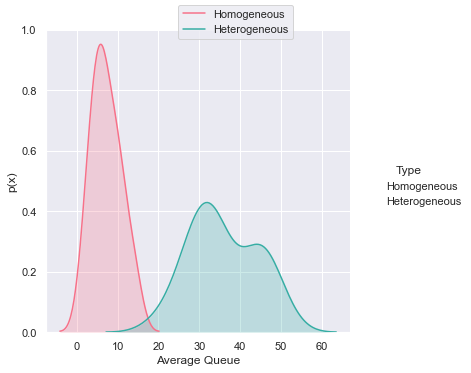

In [397]:
g = sns.pairplot(H_v, hue='Type', palette='husl', vars = ['Average Queue'], markers='d', size=5, plot_kws=
    {
    "s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'
    })

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)
for ax in g.axes.flatten():
    # print(ax, lbl)
    ax.set_ylabel('p(x)')

g.fig.subplots_adjust(top=0.92, bottom=0.08)

/Users/ribalbaroudi/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


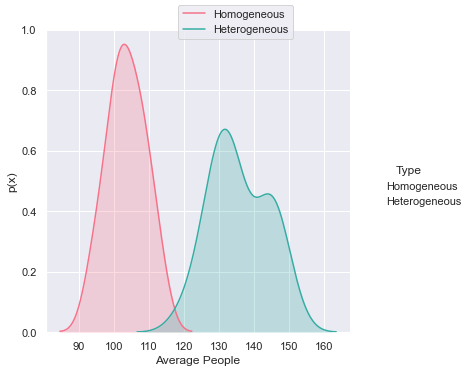

In [398]:
g = sns.pairplot(H_v, hue='Type', palette='husl', vars = ['Average People'], markers='d', size=5, plot_kws=
    {
    "s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'
    })

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)
for ax in g.axes.flatten():
    # print(ax, lbl)
    ax.set_ylabel('p(x)')

g.fig.subplots_adjust(top=0.92, bottom=0.08)

/Users/ribalbaroudi/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


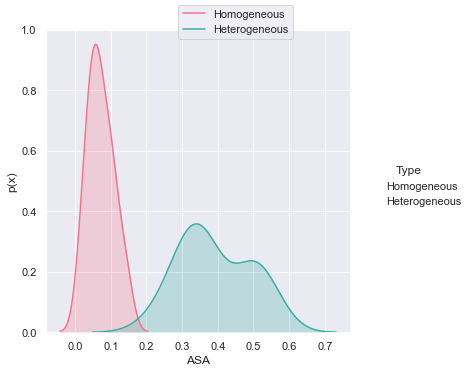

In [408]:
g = sns.pairplot(H_v, hue='Type', palette='husl', vars = ['ASA'], markers='d', size=5, plot_kws=
    {
    "s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'
    })

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)
for ax in g.axes.flatten():
    # print(ax, lbl)
    ax.set_ylabel('p(x)')

g.fig.subplots_adjust(top=0.92, bottom=0.08)

Homogeneoity in W Design

In [227]:
def FCFSR_Wsystem_htest(N, servicerate_1, arrival_rate_1, servicerate_2, arrival_rate_2, gamma, termination, a, b, c, d):
    # Setting paramters
    TNOW = 0
    TotalP = 0
    Total = 0
    Total_1 = 0
    Total_2 = 0
    # Average queue 
    free_servers = []
    Abandon = 0
    Abandon_1 = 0
    Abandon_2 = 0 
    N_served = 0
    N_served_1 = 0
    N_served_2 = 0
    
    Queue = 0 
    Queue_1 = 0 
    Queue_2 = 0 
    Q_num = 0
    Q_num_2 = 0
    Q_num_1 = 0
    Queue_name = []
    AreaQ = 0
    AreaQ_1 = 0
    AreaQ_2 = 0
    AreaP = 0
    AreaQ_rate = 0
    
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0
    
        
    Waiting_Time_Left_1 = 0
    Waiting_Time_Served_1 = 0
    Waiting_Time_Left_2 = 0
    Waiting_Time_Served_2 = 0
    
    Waiting_number_Served_1 = 0
    Waiting_number_Served_2 = 0

    # Waiting time performance measure 
    Arrival_times = {}
    
    
    # Setting up the event Calendar 
    col_name = ["Arrival_1", "Arrival_2", "Termination"]
    
    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        

    
    Class_1 = []
    Class_2 = []
    Class_3 = []
    C_1 = []
    C_2 = []
    C_3 = []
    # Selection for clases NEDDDED TO CHANGE
    # Selection for clases
    for s in free_servers:
        if a*(servicerate_1[s])+ b <= servicerate_2[s] <= 2:
            Class_3.append(s)
            C_3.append(s)
        elif c*(servicerate_1[s])+ d >= servicerate_2[s] >= 0:
            Class_1.append(s)
            C_1.append(s)
        else:
            Class_2.append(s)
            C_2.append(s)

    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrival_1"] = random.expovariate(arrival_rate_1)
    event_calendar["Arrival_2"] = random.expovariate(arrival_rate_2)
    event_calendar["Termination"] = termination
 
    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    Utilization_1 =  { s : 0 for s in free_servers}
    Utilization_2 =  { s : 0 for s in free_servers}
    
    while TNOW < termination: 
        
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event] 
        
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaQ_1 += Queue_1*(termination - TLast)
            AreaQ_2 += Queue_2*(termination - TLast)
            AreaP += TotalP*(termination - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(termination - TLast)
        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaQ_1 += Queue_1*(TNOW - TLast)
            AreaQ_2 += Queue_2*(TNOW - TLast)
            AreaP += TotalP*(TNOW - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(TNOW - TLast)
        
            
        if Next_Event == "Arrival_1":
            event_calendar["Arrival_1"] += random.expovariate(arrival_rate_1)
            TotalP += 1
            Total +=1
            Total_1 +=1
    
            if Class_2 + Class_1 == []:
                Queue += 1
                Queue_1 += 1
                Q_num += 1
                Q_num_1 += 1
                Arrival_times[str(Q_num)+ "_1"] = TNOW
                Queue_name.append(str(Q_num)+ "_1")
                event_calendar["Departure_" + str(Q_num)+"_1"] = TNOW + random.expovariate(gamma)
                        
            elif Class_1 == [] and Class_2 !=[]:
                N_served +=1
                N_served_1 +=1
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
           
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                        
            
            elif (Class_1 != [] and Class_2 != []) or (Class_1 != [] and Class_2 == [] ):
                N_served_1 +=1
                N_served +=1
                s =  random.choice(Class_1)
                free_servers.remove(s)
                Class_1.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                 
                        
        elif Next_Event == "Arrival_2":
            event_calendar["Arrival_2"] += random.expovariate(arrival_rate_2)
            TotalP += 1
            Total +=1
            Total_2 +=1
            
            if Class_2 + Class_3 == []:
                Queue += 1
                Q_num += 1
                Q_num_2 += 1
                Queue_2 += 1
                Arrival_times[str(Q_num)+ "_2"] = TNOW
                Queue_name.append(str(Q_num)+ "_2")
                event_calendar["Departure_" + str(Q_num)+"_2"] = TNOW + random.expovariate(gamma)
            
            elif Class_3 == [] and Class_2 !=[]:
                N_served_2 +=1
                N_served +=1
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])

                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += termination - TNOW
                        
            elif (Class_2 != [] and Class_3 != []) or (Class_3 != [] and Class_2== [] ):
                N_served_2 +=1
                N_served +=1
                s =  random.choice(Class_3)
                free_servers.remove(s)
                Class_3.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                
                 # Only schedule the next service if TNOW < termination
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
    
    
        elif (Next_Event).startswith("Server") == True:
            event_calendar[Next_Event] = termination + 1 
            TotalP -= 1
            free_servers.append(Next_Event)
            
            if Next_Event in C_1:
                Class_1.append(Next_Event)
            elif Next_Event in C_2:
                Class_2.append(Next_Event)
            elif Next_Event in C_3:
                Class_3.append(Next_Event)
                
            
            if Queue > 0 and free_servers != []: 
                type_1 = [i for i in Queue_name if i.endswith("_1")]
                type_2 = [i for i in Queue_name if i.endswith("_2")]
                
                if len(type_1)>0 and (len(Class_1)+len(Class_2))>0:
                    s = random.choice(Class_1+Class_2)   
                elif len(type_2)>0 and (len(Class_3)+len(Class_2))>0:
                    s = random.choice(Class_3+Class_2)
                else:
                    s = "Blabalabala"
                
                if s in Class_1:
                    if len(type_1)>0:
                        free_servers.remove(s)
                        Class_1.remove(s)
                        Queue -= 1 
                        Queue_1 -= 1
                        N_served_1 +=1
                        N_served +=1
                        next_served = type_1[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        del event_calendar["Departure_"+ next_served]
                        Queue_name.remove(next_served)
                  
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_1[s] += termination - TNOW
                  
                            
                        Waiting_number_Served += 1 
                        Waiting_number_Served_1 += 1 
                        del Arrival_times[next_served]        
                                            
                elif s in Class_3:
                    if len(type_2)>0:
                        free_servers.remove(s)
                        Class_3.remove(s)
                        Queue -= 1 
                        Queue_2 -= 1
                        N_served_2 +=1
                        N_served +=1
                        next_served = type_2[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        del event_calendar["Departure_"+next_served]
                        Queue_name.remove(next_served)
                        
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_2[s] += termination - TNOW
 
                        Waiting_number_Served += 1 
                        Waiting_number_Served_2 += 1 
                        del Arrival_times[next_served]
                        
                elif s in Class_2:
                    next_served = Queue_name[0]
                    free_servers.remove(s)
                    Class_2.remove(s)
                    Queue -= 1 
                    if next_served.endswith("_1"):
                        Queue_1 -= 1 
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        Waiting_number_Served_1 += 1 
                        N_served_1 +=1
                        N_served +=1
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_1[s] += termination - TNOW
                        
                    else:
                        Queue_2 -= 1
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        Waiting_number_Served_2 += 1 
                        N_served_2 +=1
                        N_served +=1
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_2[s] += termination - TNOW
                        
                    del event_calendar["Departure_"+ next_served]
                    Queue_name.remove(next_served)
                    
                    Waiting_Time_Served += TNOW - Arrival_times[next_served]
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW
                            
                    Waiting_number_Served += 1 
                    del Arrival_times[next_served]

    
        ## Departure for which queue             
        if (Next_Event).startswith("Departure") == True:        
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            
            if Next_Event.endswith("_1") == True:
                Abandon_1 +=1
                Queue_1 -=1
                Waiting_Time_Left_1 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            else:
                Abandon_2 +=1
                Queue_2 -=1
                Waiting_Time_Left_2 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
                
            Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]      
            del event_calendar[Next_Event]
            Queue_name.remove(Next_Event[Next_Event.index("u")+4:])
            del Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            
        
    val = 0
    for k in Total_Utilization:
        val +=  Total_Utilization[k]
    avg_u = val/len(Total_Utilization)/termination
        
        
    val = 0
    for k in Utilization_1:
        val +=  Utilization_1[k]
    avg_u_1 = val/len(set(C_1 + C_2))/termination
        
        
    val = 0
    for k in Utilization_2:
        val +=  Utilization_2[k]
    avg_u_2 = val/len(set(C_2 + C_3))/termination
    
    split_1 = len(C_1)
    split_2 = len(C_3)
    pool_2 = len(C_2)
    
        
    if Abandon == 0:
        Waiting_T_A = Waiting_Time_Left/1
    else:
        Waiting_T_A = Waiting_Time_Left/Abandon
        
    if Abandon_1 == 0:
        Waiting_T_A_1 =  Waiting_Time_Left_1/1
    else:
        Waiting_T_A_1 =  Waiting_Time_Left_1/Abandon_1
    
    if Abandon_2 == 0:
        Waiting_T_A_2 =  Waiting_Time_Left_2/1
    else:
        Waiting_T_A_2 =  Waiting_Time_Left_2/Abandon_2
    
    Avg_serv_rate=0
    for i in servicerate_1:
        Avg_serv_rate += servicerate_1[i]+servicerate_2[i]
    Avg_serv_rate = Avg_serv_rate/2*len(servicerate_1)
    
    
    Total_serv_rate=0
    for i in servicerate_1:
        Total_serv_rate += (servicerate_1[i]*Utilization_1[i]/termination)+(servicerate_2[i]*Utilization_2[i]/termination)
        
        
    Total_serv_rate_1=0
    for i in servicerate_1:
        Total_serv_rate_1 += (servicerate_1[i]*Utilization_1[i]/termination)
       
    
    Total_serv_rate_2=0
    for i in servicerate_1:
        Total_serv_rate_2+= (servicerate_2[i]*Utilization_2[i]/termination)
    
    sv_1 = 0
    for i in C_1:
        sv_1 += servicerate_1[i]
    sv_1 = sv_1/len(C_1)
    
    sv_2 = 0
    for i in C_2:
        sv_2 += servicerate_2[i] + servicerate_1[i]
    sv_2 = sv_2/(2*len(C_2))
    
    sv_3 = 0
    for i in C_3:
        sv_3 += servicerate_2[i]
    sv_3 = sv_3/len(C_3)
        
    return Abandon, Q_num, Waiting_T_A, Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaQ_rate/termination, Total, Total_Utilization,Avg_serv_rate, Utilization_1,  Utilization_2, Abandon_1, Abandon_2, N_served_1, N_served_2, Waiting_T_A_1 , Waiting_T_A_2 , Waiting_Time_Served_1/N_served_1, Waiting_Time_Served_2/N_served_2, avg_u_1,avg_u_2, Abandon_1/Total_1, Abandon_2/Total_2, N_served_1, N_served_2, split_1, split_2, pool_2, Total_serv_rate, Total_1, Total_2, Total_serv_rate_1, Total_serv_rate_2,  AreaQ_1/termination, AreaQ_2/termination, sv_1, sv_2, sv_3

In [228]:
def FCFSR_Wsystem_htest_AVG(N, sv_1, arrival_rate_1, sv_2, arrival_rate_2, gamma, termination, sv_3, split_1, split_2):
    # Setting paramters
    TNOW = 0
    TotalP = 0
    Total = 0
    Total_1 = 0
    Total_2 = 0
    # Average queue 
    free_servers = []
    Abandon = 0
    Abandon_1 = 0
    Abandon_2 = 0 
    N_served = 0
    N_served_1 = 0
    N_served_2 = 0
    
    Queue = 0 
    Queue_1 = 0 
    Queue_2 = 0 
    Q_num = 0
    Q_num_2 = 0
    Q_num_1 = 0
    Queue_name = []
    AreaQ = 0
    AreaQ_1 = 0
    AreaQ_2 = 0
    AreaP = 0
    AreaQ_rate = 0
    
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0
    
        
    Waiting_Time_Left_1 = 0
    Waiting_Time_Served_1 = 0
    Waiting_Time_Left_2 = 0
    Waiting_Time_Served_2 = 0
    
    Waiting_number_Served_1 = 0
    Waiting_number_Served_2 = 0

    # Waiting time performance measure 
    Arrival_times = {}
    
    
    # Setting up the event Calendar 
    col_name = ["Arrival_1", "Arrival_2", "Termination"]
    
    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        
    
    servicerate_1 = {s:0 for s in free_servers}
    servicerate_2 = {s:0 for s in free_servers}
    
    Class_1 = []
    Class_2 = []
    Class_3 = []
    C_1 = []
    C_2 = []
    C_3 = []
    # Selection for clases NEDDDED TO CHANGE
    for s in range(0,N):
        if s < split_1:
            Class_1.append(free_servers[s])
            C_1.append(free_servers[s])
            servicerate_1[free_servers[s]] = sv_1
            
        
        elif s >= split_1 and s <split_1+split_2:
            Class_2.append(free_servers[s])
            C_2.append(free_servers[s])
            servicerate_1[free_servers[s]] = sv_2
            servicerate_2[free_servers[s]] = sv_2
        
        else:
            Class_3.append(free_servers[s])
            C_3.append(free_servers[s])
            servicerate_2[free_servers[s]] = sv_3
            

    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrival_1"] = random.expovariate(arrival_rate_1)
    event_calendar["Arrival_2"] = random.expovariate(arrival_rate_2)
    event_calendar["Termination"] = termination
 
    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    Utilization_1 =  { s : 0 for s in free_servers}
    Utilization_2 =  { s : 0 for s in free_servers}
    
    while TNOW < termination: 
        
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event] 
        
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaQ_1 += Queue_1*(termination - TLast)
            AreaQ_2 += Queue_2*(termination - TLast)
            AreaP += TotalP*(termination - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(termination - TLast)
        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaQ_1 += Queue_1*(TNOW - TLast)
            AreaQ_2 += Queue_2*(TNOW - TLast)
            AreaP += TotalP*(TNOW - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(TNOW - TLast)
        
            
        if Next_Event == "Arrival_1":
            event_calendar["Arrival_1"] += random.expovariate(arrival_rate_1)
            TotalP += 1
            Total +=1
            Total_1 +=1
    
            if Class_2 + Class_1 == []:
                Queue += 1
                Queue_1 += 1
                Q_num += 1
                Q_num_1 += 1
                Arrival_times[str(Q_num)+ "_1"] = TNOW
                Queue_name.append(str(Q_num)+ "_1")
                event_calendar["Departure_" + str(Q_num)+"_1"] = TNOW + random.expovariate(gamma)
                        
            elif Class_1 == [] and Class_2 !=[]:
                N_served +=1
                N_served_1 +=1
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
           
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                        
            
            elif (Class_1 != [] and Class_2 != []) or (Class_1 != [] and Class_2 == [] ):
                N_served_1 +=1
                N_served +=1
                s =  random.choice(Class_1)
                free_servers.remove(s)
                Class_1.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                 
                        
        elif Next_Event == "Arrival_2":
            event_calendar["Arrival_2"] += random.expovariate(arrival_rate_2)
            TotalP += 1
            Total +=1
            Total_2 +=1
            
            if Class_2 + Class_3 == []:
                Queue += 1
                Q_num += 1
                Q_num_2 += 1
                Queue_2 += 1
                Arrival_times[str(Q_num)+ "_2"] = TNOW
                Queue_name.append(str(Q_num)+ "_2")
                event_calendar["Departure_" + str(Q_num)+"_2"] = TNOW + random.expovariate(gamma)
            
            elif Class_3 == [] and Class_2 !=[]:
                N_served_2 +=1
                N_served +=1
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])

                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += termination - TNOW
                        
            elif (Class_2 != [] and Class_3 != []) or (Class_3 != [] and Class_2== [] ):
                N_served_2 +=1
                N_served +=1
                s =  random.choice(Class_3)
                free_servers.remove(s)
                Class_3.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                
                 # Only schedule the next service if TNOW < termination
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
    
    
        elif (Next_Event).startswith("Server") == True:
            event_calendar[Next_Event] = termination + 1 
            TotalP -= 1
            free_servers.append(Next_Event)
            
            if Next_Event in C_1:
                Class_1.append(Next_Event)
            elif Next_Event in C_2:
                Class_2.append(Next_Event)
            elif Next_Event in C_3:
                Class_3.append(Next_Event)
                
            
            if Queue > 0 and free_servers != []: 
                type_1 = [i for i in Queue_name if i.endswith("_1")]
                type_2 = [i for i in Queue_name if i.endswith("_2")]
                
                if len(type_1)>0 and (len(Class_1)+len(Class_2))>0:
                    s = random.choice(Class_1+Class_2)   
                elif len(type_2)>0 and (len(Class_3)+len(Class_2))>0:
                    s = random.choice(Class_3+Class_2)
                else:
                    s = "Blabalabala"
                
                if s in Class_1:
                    if len(type_1)>0:
                        free_servers.remove(s)
                        Class_1.remove(s)
                        Queue -= 1 
                        Queue_1 -= 1
                        N_served_1 +=1
                        N_served +=1
                        next_served = type_1[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        del event_calendar["Departure_"+ next_served]
                        Queue_name.remove(next_served)
                  
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_1[s] += termination - TNOW
                  
                            
                        Waiting_number_Served += 1 
                        Waiting_number_Served_1 += 1 
                        del Arrival_times[next_served]        
                                            
                elif s in Class_3:
                    if len(type_2)>0:
                        free_servers.remove(s)
                        Class_3.remove(s)
                        Queue -= 1 
                        Queue_2 -= 1
                        N_served_2 +=1
                        N_served +=1
                        next_served = type_2[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        del event_calendar["Departure_"+next_served]
                        Queue_name.remove(next_served)
                        
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_2[s] += termination - TNOW
 
                        Waiting_number_Served += 1 
                        Waiting_number_Served_2 += 1 
                        del Arrival_times[next_served]
                        
                elif s in Class_2:
                    next_served = Queue_name[0]
                    free_servers.remove(s)
                    Class_2.remove(s)
                    Queue -= 1 
                    if next_served.endswith("_1"):
                        Queue_1 -= 1 
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        Waiting_number_Served_1 += 1 
                        N_served_1 +=1
                        N_served +=1
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_1[s] += termination - TNOW
                        
                    else:
                        Queue_2 -= 1
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        Waiting_number_Served_2 += 1 
                        N_served_2 +=1
                        N_served +=1
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_2[s] += termination - TNOW
                        
                    del event_calendar["Departure_"+ next_served]
                    Queue_name.remove(next_served)
                    
                    Waiting_Time_Served += TNOW - Arrival_times[next_served]
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW
                            
                    Waiting_number_Served += 1 
                    del Arrival_times[next_served]

    
        ## Departure for which queue             
        if (Next_Event).startswith("Departure") == True:        
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            
            if Next_Event.endswith("_1") == True:
                Abandon_1 +=1
                Queue_1 -=1
                Waiting_Time_Left_1 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            else:
                Abandon_2 +=1
                Queue_2 -=1
                Waiting_Time_Left_2 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
                
            Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]      
            del event_calendar[Next_Event]
            Queue_name.remove(Next_Event[Next_Event.index("u")+4:])
            del Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            
        
    val = 0
    for k in Total_Utilization:
        val +=  Total_Utilization[k]
    avg_u = val/len(Total_Utilization)/termination
        
        
    val = 0
    for k in Utilization_1:
        val +=  Utilization_1[k]
    avg_u_1 = val/len(set(C_1 + C_2))/termination
        
        
    val = 0
    for k in Utilization_2:
        val +=  Utilization_2[k]
    avg_u_2 = val/len(set(C_2 + C_3))/termination
    
    split_1 = len(set(C_1 + C_2))
    split_2 = len(set(C_2 + C_3))
    pool_2 = len(C_2)
    
        
    if Abandon == 0:
        Waiting_T_A = Waiting_Time_Left/1
    else:
        Waiting_T_A = Waiting_Time_Left/Abandon
        
    if Abandon_1 == 0:
        Waiting_T_A_1 =  Waiting_Time_Left_1/1
    else:
        Waiting_T_A_1 =  Waiting_Time_Left_1/Abandon_1
    
    if Abandon_2 == 0:
        Waiting_T_A_2 =  Waiting_Time_Left_2/1
    else:
        Waiting_T_A_2 =  Waiting_Time_Left_2/Abandon_2
    
    Avg_serv_rate=0
    for i in servicerate_1:
        Avg_serv_rate += servicerate_1[i]+servicerate_2[i]
    Avg_serv_rate = Avg_serv_rate/2*len(servicerate_1)
    

    Total_serv_rate=0
    for i in servicerate_1:
        Total_serv_rate += (servicerate_1[i]*Utilization_1[i]/termination)+(servicerate_2[i]*Utilization_2[i]/termination)
        
        
    Total_serv_rate_1=0
    for i in servicerate_1:
        Total_serv_rate_1 += (servicerate_1[i]*Utilization_1[i]/termination)
       
    
    Total_serv_rate_2=0
    for i in servicerate_1:
        Total_serv_rate_2+= (servicerate_2[i]*Utilization_2[i]/termination)
        
        
    sv_1 = 0
    for i in C_1:
        sv_1 += servicerate_1[i]
    sv_1 = sv_1/len(C_1)
    
    sv_2 = 0
    for i in C_2:
        sv_2 += servicerate_2[i] + servicerate_1[i]
    sv_2 = sv_2/(2*len(C_2))
    
    sv_3 = 0
    for i in C_3:
        sv_3 += servicerate_2[i]
    sv_3 = sv_3/len(C_3)
    
        
    return Abandon, Q_num, Waiting_T_A, Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaQ_rate/termination, Total, Total_Utilization,Avg_serv_rate, Utilization_1,  Utilization_2, Abandon_1, Abandon_2, N_served_1, N_served_2, Waiting_T_A_1 , Waiting_T_A_2 , Waiting_Time_Served_1/N_served_1, Waiting_Time_Served_2/N_served_2, avg_u_1,avg_u_2, Abandon_1/Total_1, Abandon_2/Total_2, N_served_1, N_served_2, split_1, split_2, pool_2, Total_serv_rate, Total_1, Total_2, Total_serv_rate_1, Total_serv_rate_2,  AreaQ_1/termination, AreaQ_2/termination, sv_1, sv_2, sv_3

In [229]:
def Edit_Entry_2(x):
    new_entry = {}
    new_entry.update( Served = x[4])
    new_entry.update( Served_1 = x[16])
    new_entry.update( Served_2 = x[17])
    new_entry.update( Abandoned = x[0])
    new_entry.update( Waited = x[1])
    new_entry.update( Waiting_Time_S = x[3])
    new_entry.update( Waiting_Time_A = x[2])
    new_entry.update( Utilization = x[5])
    new_entry.update( Avg_Queue = x[6])
    new_entry.update( Queue_Fraction = x[8])
    new_entry.update( Avg_People = x[7])
    new_entry.update( Avg_servicerate = x[11])
    new_entry.update( Abandonned_1 = x[14])
    new_entry.update( Abandonned_2 = x[15])
    new_entry.update( Pooling_1 = x[28]-x[30])
    new_entry.update( Pooling_2 = x[30])
    new_entry.update( Pooling_3 = x[29]-x[30])
    new_entry.update( sv_1 = x[-3])
    new_entry.update( sv_2 = x[-2])
    new_entry.update( sv_3 = x[-1])
    return new_entry

In [232]:
W_Homogeneous = pd.DataFrame ()
W_Heterogeneous = pd.DataFrame ()

new_entry = {}

free_servers = []

for i in range(0, 100): 
    free_servers += ["Server_"+str(i)]  
    
servicerate_1_1 = {}
servicerate_2_2 = {}

for i in range(0,20):
    
    servicerate_1_1 = {}
    for server in free_servers:
        servicerate_1_1.update({ server : random.uniform(0,2)})

    servicerate_2_2 = {}
    for server in free_servers:
        servicerate_2_2.update({ server : random.uniform(0,2)})
        
    
    x = FCFSR_Wsystem_htest(100, servicerate_1_1, 50, servicerate_2_2, 50, 0.5, 40000, 1, 0.5, 1, -0.5)
    new_entry = Edit_Entry_2(x)
    W_Heterogeneous = W_Heterogeneous.append(new_entry, ignore_index = True)
    print(i)
    w = FCFSR_Wsystem_htest_AVG(100, x[-3], 50,x[-2], 50, 0.5, 40000, x[-1], x[-13], x[-11])
    new_entry = Edit_Entry_2(w)
    W_Homogeneous = W_Homogeneous.append(new_entry, ignore_index = True)
    
    print(i)

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19


In [330]:
compare = [W_Homogeneous, W_Heterogeneous]

col_name = ["Measure", "System", "Mean", "Variance", "Type"]
Level = ["W", "W"]
T = [ "Homogeneous", "Heterogeneous"]
m_3 = pd.DataFrame (columns = col_name)
new_entry = { c : 0 for c in col_name}
b = 0
for c in compare:
    for key in ['Abandoned', 'Served', 'Utilization','Waited', 'Waiting_Time_A', 'Waiting_Time_S']:
        new_entry.update(System = Level[b])
        new_entry.update(Type = T[b])
        new_entry.update( Measure = key)
        new_entry.update( Mean =  round(c[key].mean(), 5))
        new_entry.update( Variance =  statistics.variance((c[key])))
        intervl = scipy.stats.t.ppf(q=.975,df=19)*np.sqrt(statistics.variance(c[key]))/np.sqrt(20)
        new_entry.update( ConfidenceInterval = "("+str(round(c[key].mean() - intervl, 5))+ ","+ str(round(c[key].mean() + intervl, 5))+")")
        m_3 = m_3.append(new_entry, ignore_index = True)
    b+=1

In [331]:
W_Homogeneous["Type"]  = 'Homogeneous'
W_Heterogeneous["Type"]  = 'Heterogeneous'

In [332]:
H_h = pd.DataFrame()
H_h = H_h.append(W_Homogeneous, ignore_index = True)
H_h = H_h.append(W_Heterogeneous, ignore_index = True)

In [333]:
m_3.sort_values("Measure")[["Type", "Measure", "Mean", "Variance", "ConfidenceInterval"]]

,Type,Measure,Mean,Variance,ConfidenceInterval
0,Homogeneous,Abandoned,8.296500e+02,1.034501e+06,"(353.63053,1305.66947)"
6,Heterogeneous,Abandoned,1.621750e+03,3.500695e+06,"(746.08827,2497.41173)"
1,Homogeneous,Served,3.999344e+06,3.759692e+06,"(3998436.37356,4000251.32644)"
7,Heterogeneous,Served,3.998636e+06,1.032755e+07,"(3997131.91514,4000139.98486)"
2,Homogeneous,Utilization,7.448800e-01,1.236015e-03,"(0.72843,0.76134)"
8,Heterogeneous,Utilization,7.826300e-01,1.416338e-03,"(0.76502,0.80025)"
3,Homogeneous,Waited,4.113820e+04,1.962358e+09,"(20405.86095,61870.53905)"
9,Heterogeneous,Waited,7.792665e+04,5.628455e+09,"(42814.7911,113038.5089)"
4,Homogeneous,Waiting_Time_A,3.346000e-02,2.447809e-05,"(0.03114,0.03577)"
10,Heterogeneous,Waiting_Time_A,3.434000e-02,2.904213e-05,"(0.03181,0.03686)"


In [411]:
1.621750e+03 

1621.75

In [412]:
8.296500e+2

829.65

In [334]:
W_Homogeneous

,Abandoned,Abandonned_1,Abandonned_2,Avg_People,Avg_Queue,Avg_servicerate,Pooling_1,Pooling_2,Pooling_3,Queue_Fraction,...,Served_1,Served_2,Utilization,Waited,Waiting_Time_A,Waiting_Time_S,sv_1,sv_2,sv_3,Type
0,728.0,422.0,306.0,76.247298,0.034831,8828.322550,24.0,46.0,30.0,0.000330,...,2000186.0,1998144.0,0.762125,39034.0,0.032735,0.000342,1.427056,1.075179,1.446688,Homogeneous
1,225.0,106.0,119.0,72.542591,0.010741,8994.266847,30.0,45.0,25.0,0.000103,...,1997933.0,2000197.0,0.725318,13504.0,0.028372,0.000106,1.544405,1.071787,1.483694,Homogeneous
2,222.0,123.0,99.0,72.458409,0.011010,9038.162662,27.0,44.0,29.0,0.000105,...,2002199.0,2000041.0,0.724474,13329.0,0.028074,0.000108,1.471536,1.099836,1.525732,Homogeneous
3,732.0,393.0,339.0,76.210366,0.035989,8707.026318,26.0,47.0,27.0,0.000340,...,1999553.0,1998889.0,0.761744,40435.0,0.033450,0.000354,1.444967,1.021531,1.501758,Homogeneous
4,1100.0,608.0,492.0,76.914546,0.052810,8768.090811,23.0,52.0,25.0,0.000498,...,1998970.0,2001417.0,0.768617,56420.0,0.035293,0.000518,1.485937,0.975109,1.590958,Homogeneous
5,565.0,173.0,392.0,74.070880,0.029217,8314.599324,33.0,43.0,24.0,0.000280,...,1999123.0,1999551.0,0.740417,30970.0,0.034898,0.000287,1.550189,0.902629,1.562903,Homogeneous
6,512.0,269.0,243.0,73.782676,0.023848,8531.096201,29.0,41.0,30.0,0.000225,...,1998773.0,1996838.0,0.737588,24712.0,0.036102,0.000234,1.445890,1.010704,1.527114,Homogeneous
7,298.0,147.0,151.0,73.395951,0.013242,8781.930690,30.0,40.0,30.0,0.000126,...,1997896.0,2000527.0,0.733827,15958.0,0.031329,0.000130,1.463174,1.106818,1.439931,Homogeneous
8,4210.0,1637.0,2573.0,81.622791,0.215155,8231.226519,29.0,51.0,20.0,0.002010,...,2000455.0,1996503.0,0.814076,182533.0,0.042570,0.002108,1.536037,0.895167,1.438620,Homogeneous
9,257.0,145.0,112.0,72.876705,0.012568,8719.025528,30.0,41.0,29.0,0.000120,...,2000057.0,1998853.0,0.728641,15454.0,0.028686,0.000124,1.458325,1.054990,1.521435,Homogeneous


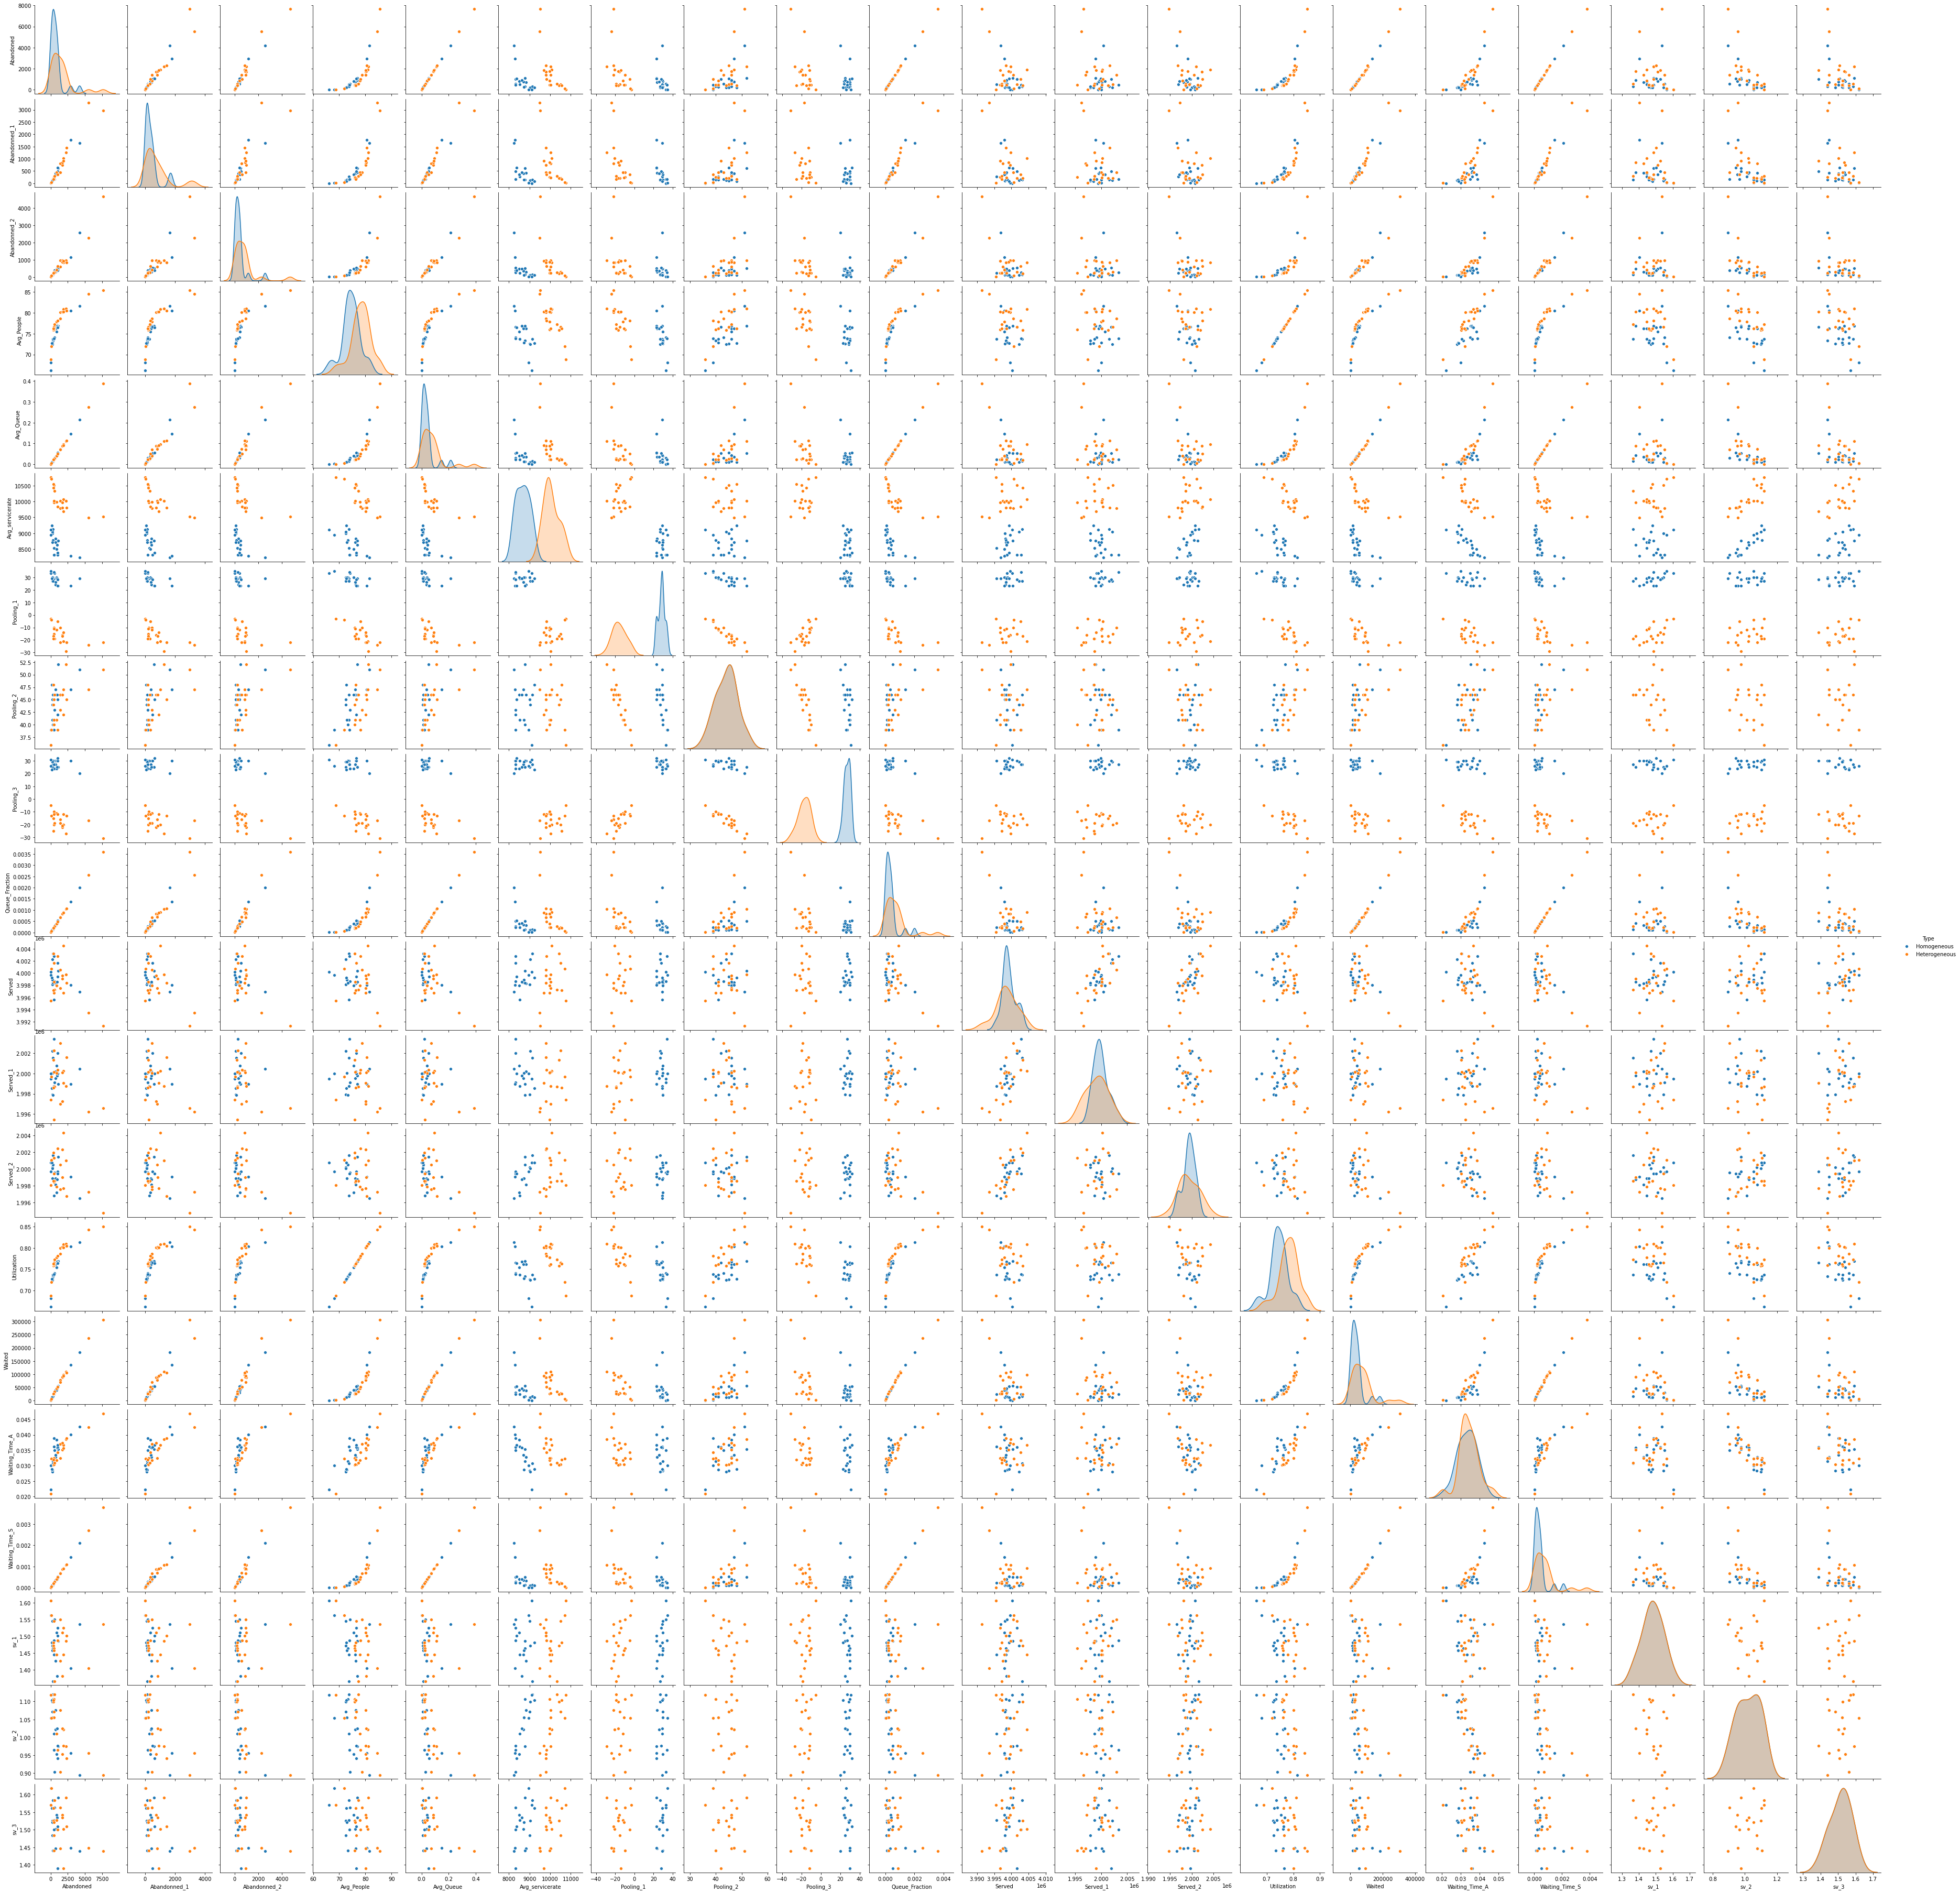

In [238]:
import seaborn as sns


sns.pairplot(H_h, hue="Type")

In [354]:
H_h["Average Queue"] = H_h["Avg_Queue"]
H_h["Average People"] = H_h["Avg_People"]
H_h["ASA"] = H_h["Waiting_Time_S"]

/Users/ribalbaroudi/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


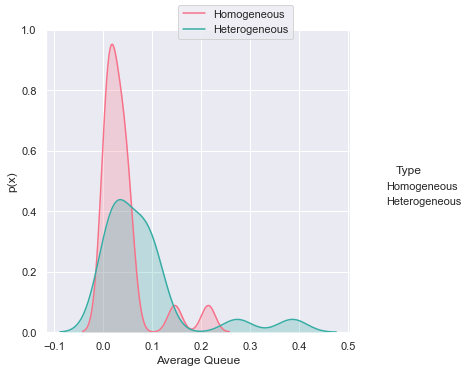

In [339]:
g = sns.pairplot(H_h, hue='Type', palette='husl', vars = ['Average Queue'], markers='d', size=5, plot_kws=
    {
    "s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'
    })

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)
for ax in g.axes.flatten():
    # print(ax, lbl)
    ax.set_ylabel('p(x)')

g.fig.subplots_adjust(top=0.92, bottom=0.08)

/Users/ribalbaroudi/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


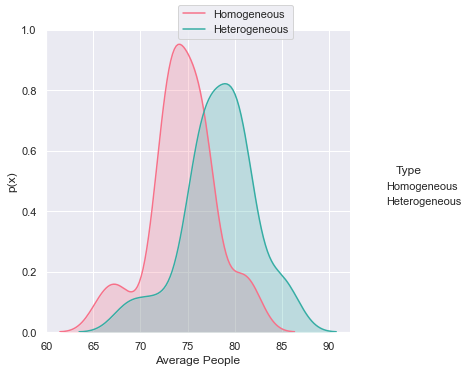

In [340]:
labels=["Probability"]

labels=["Probability"]
g = sns.pairplot(H_h, hue='Type', palette='husl', vars = ['Average People'], markers='d', size=5, plot_kws=
    {
    "s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'
    })

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)
for ax in g.axes.flatten():
    # print(ax, lbl)
    ax.set_ylabel('p(x)')

g.fig.subplots_adjust(top=0.92, bottom=0.08)

/Users/ribalbaroudi/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


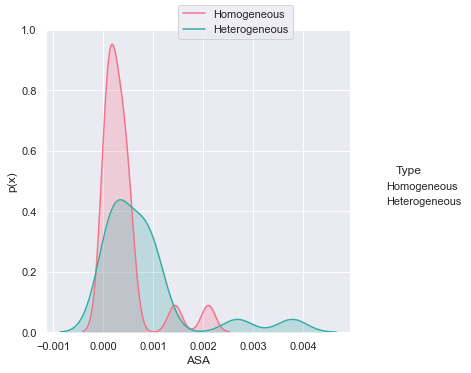

In [355]:
labels=["Probability"]

labels=["Probability"]
g = sns.pairplot(H_h, hue='Type', palette='husl', vars = ['ASA'], markers='d', size=5, plot_kws=
    {
    "s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'
    })

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)
for ax in g.axes.flatten():
    # print(ax, lbl)
    ax.set_ylabel('p(x)')

g.fig.subplots_adjust(top=0.92, bottom=0.08)

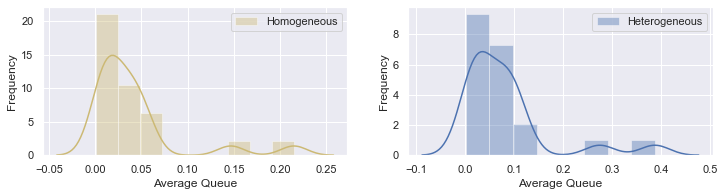

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from pylab import *

sns.set(rc={"figure.figsize": (12, 6)})
subplot(2,2,1)
ax_1 = sns.distplot(W_Homogeneous["Avg_Queue"], color="y", label = "Homogeneous")
ax_1.set(xlabel='Average Queue', ylabel='Frequency')
subplot(2,2,2)
ax_2 = sns.distplot(W_Heterogeneous["Avg_Queue"], color="b", label = "Heterogeneous")
ax_2.set(xlabel='Average Queue', ylabel='Frequency')

ax_1.legend()
ax_2.legend()
plt.show()

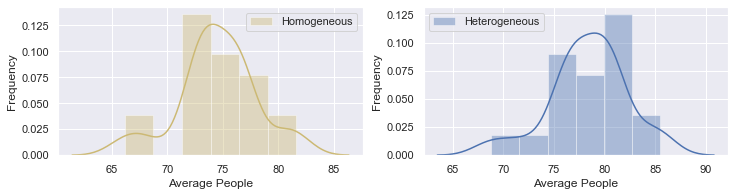

In [351]:
sns.set(rc={"figure.figsize": (12, 6)})
subplot(2,2,1)
ax_1 = sns.distplot(W_Homogeneous["Avg_People"], color="y", label = "Homogeneous")
ax_1.set(xlabel='Average People', ylabel='Frequency')
subplot(2,2,2)
ax_2 = sns.distplot(W_Heterogeneous["Avg_People"], color="b", label = "Heterogeneous")
ax_2.set(xlabel='Average People', ylabel='Frequency')

ax_1.legend()
ax_2.legend()
plt.show()

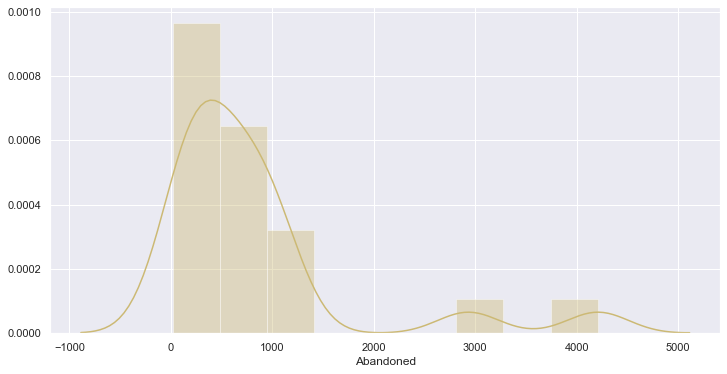

In [353]:
sns.distplot(W_Homogeneous["Abandoned"], color="y", label = "Homogeneous")

OLD CODE

Compare the heterogeneous V system with the V system with an average. The below code still holds. Do we need to comment on similarities with S system ?

In [12]:
def Edit_Entry(x):
    new_entry = {}
    new_entry.update( Served = x[4])
    new_entry.update( Served_1 = x[12])
    new_entry.update( Served_2 = x[13])
    new_entry.update( Waited = x[1])
    new_entry.update( Abandoned = x[0])
    new_entry.update( Waiting_Time_S = x[3])
    new_entry.update( Waiting_Time_A = x[2])
    new_entry.update( Utilization = x[5])
    new_entry.update( Queue_Fraction = x[8])
    new_entry.update( Avg_People = x[7])
    new_entry.update( Avg_Queue = x[6])
    new_entry.update( Porportion_Waiting = x[1] /x[9])
    new_entry.update( Porportion_Abandonned = x[0] /x[9])
    return new_entry

In [14]:
W_homo_list = []
W_homo2_list = []
W_hetero_list = []
V_homo2_list = []
matrix_W_homo = pd.DataFrame ()
matrix_W_hetero = pd.DataFrame ()
matrix_W_homo_2 = pd.DataFrame ()
matrix_v_homo_2 = pd.DataFrame ()

new_entry = {}

free_servers = []
for i in range(0, 100): 
    free_servers += ["Server_"+str(i)]  
    
servicerate_1_1 = {}
servicerate_2_2 = {}
servicerate_h_1 = {}
servicerate_h_2 = {}
servicerate_h_ = {}
sr_1 = 0
sr_2 = 0

for s in free_servers:
    servicerate_h_[s] = 1

        
for i in range(0,5):
    
    for s in free_servers:
        servicerate_1_1[s] = serv_rate_1[i][s]
        servicerate_2_2[s] = serv_rate_2[i][s]
        sr_1 += servicerate_1_1[s] 
        sr_2 += servicerate_2_2[s]
    
    sr_1 = sr_1/100
    sr_2 = sr_2/100
    
    for s in free_servers:
        servicerate_h_1[s] = sr_1
        servicerate_h_2[s] = sr_2
        
        
    d = Random_FCFS(100, servicerate_h_1, 50, servicerate_h_2, 50, 0.5, 60000)
    V_homo2_list.append(d)
    new_entry = Edit_Entry(d)
    matrix_v_homo_2 = matrix_v_homo_2.append(new_entry, ignore_index = True)
    
    x = FCFSR_Wsystem_htest(100, servicerate_1_1, 50, servicerate_2_2, 50, 0.5, 60000)
    W_hetero_list.append(x)
    new_entry = Edit_Entry_2(x)
    matrix_W_hetero = matrix_W_hetero.append(new_entry, ignore_index = True)
    
    
    d = Random_FCFS(100, servicerate_h_1, 50, servicerate_h_2, 50, 0.5, 60000)
    V_homo2_list.append(d)
    new_entry = Edit_Entry(d)
    matrix_v_homo_2 = matrix_v_homo_2.append(new_entry, ignore_index = True)

    
    y = FCFSR_Wsystem_htest(100, servicerate_h_ , 50, servicerate_h_ , 50, 0.5, 60000)
    W_homo_list.append(y)
    new_entry = Edit_Entry_2(y)
    matrix_W_homo = matrix_W_homo.append(new_entry, ignore_index = True)
    
    w = FCFSR_Wsystem_htest(100, servicerate_h_1, 50, servicerate_h_2, 50, 0.5, 60000)
    W_homo2_list.append(w)
    new_entry = Edit_Entry_2(w)
    matrix_W_homo_2 = matrix_W_homo_2.append(new_entry, ignore_index = True)
    
    print(i)

0
1
2
3
4
5
6
7
8
9


In [290]:
matrix_v_homo_2

,Abandoned,Avg_People,Avg_Queue,Porportion_Abandonned,Porportion_Waiting,Queue_Fraction,Served,Served_1,Served_2,Utilization,Waited,Waiting_Time_A,Waiting_Time_S
0,142270.0,100.221609,4.741821,0.023700,0.495550,0.041030,5860629.0,2928637.0,2931992.0,0.954798,2974746.0,0.078949,0.046629
1,118523.0,98.709765,3.951516,0.019750,0.443610,0.034426,5882600.0,2942454.0,2940146.0,0.947582,2662160.0,0.074150,0.038810
2,90868.0,96.665292,3.021007,0.015145,0.372622,0.026534,5909137.0,2955918.0,2953219.0,0.936443,2235733.0,0.069202,0.029610
3,165476.0,101.560815,5.512558,0.027581,0.540810,0.047416,5834199.0,2918273.0,2915926.0,0.960483,3244690.0,0.082653,0.054348
4,82440.0,96.120880,2.745803,0.013742,0.351393,0.024203,5916774.0,2958054.0,2958720.0,0.933751,2108083.0,0.067069,0.026910
5,182281.0,102.429890,6.052481,0.030376,0.569712,0.051805,5818574.0,2907982.0,2910592.0,0.963774,3418768.0,0.085542,0.059732
6,537142.0,117.319611,17.885651,0.089527,0.904286,0.142009,5462635.0,2732217.0,2730418.0,0.994340,5425537.0,0.137711,0.182909
7,316980.0,108.847472,10.615428,0.052833,0.751675,0.088077,5682668.0,2840305.0,2842363.0,0.982320,4509786.0,0.106611,0.106135
8,116423.0,98.581633,3.877757,0.019413,0.437452,0.033784,5880792.0,2940254.0,2940538.0,0.947039,2623491.0,0.074260,0.038093
9,278096.0,107.096293,9.264011,0.046398,0.708131,0.077533,5715654.0,2858226.0,2857428.0,0.978323,4244363.0,0.100921,0.092339


In [27]:
compare = [matrix_W_homo,matrix_W_hetero,matrix_W_homo_2,matrix_v_homo_2]

col_name = ["Measure", "System", "Mean", "Variance", "Type"]
Level = ["W", "W", "W", "V"]
T = [ "Homogeneous Rate 1", "Heterogeneous","Homogeneous Avg Rates", "Homogeneous Avg Rates"]
m_2 = pd.DataFrame (columns = col_name)
new_entry = { c : 0 for c in col_name}
b = 0
for c in compare:
    for key in ['Abandoned', 'Avg_People', 'Porportion_Abandonned', 'Porportion_Waiting','Queue_Fraction', 'Served', 'Utilization','Waited', 'Waiting_Time_A', 'Waiting_Time_S']:
        new_entry.update(System = Level[b])
        new_entry.update(Type = T[b])
        new_entry.update( Measure = key)
        new_entry.update( Mean =  round(c[key].mean(), 3))
        new_entry.update( Variance =  statistics.variance((c[key])))
        m_2 = m_2.append(new_entry, ignore_index = True)
    b+=1

In [31]:
m_2.sort_values(["Measure", "Mean"])

,Measure,System,Mean,Variance,Type
30,Abandoned,V,203049.900,1.972749e+10,Homogeneous Avg Rates
0,Abandoned,W,206959.700,6.000972e+06,Homogeneous Rate 1
20,Abandoned,W,213967.200,1.890620e+10,Homogeneous Avg Rates
10,Abandoned,W,370590.200,3.453724e+10,Heterogeneous
31,Avg_People,V,102.755,4.343553e+01,Homogeneous Avg Rates
21,Avg_People,W,102.986,4.294038e+01,Homogeneous Avg Rates
1,Avg_People,W,103.452,8.290334e-03,Homogeneous Rate 1
11,Avg_People,W,110.345,5.393591e+01,Heterogeneous
2,Porportion_Abandonned,W,0.034,1.674015e-07,Homogeneous Rate 1
32,Porportion_Abandonned,V,0.034,5.481718e-04,Homogeneous Avg Rates


In [42]:
matrix_W_homo_2["Avg_servicerate"] = matrix_W_homo_2["Avg_servicerate"]/10000

In [43]:
matrix_W_homo_2

,Abandoned,Abandonned_1,Abandonned_2,Avg_People,Avg_Queue,Avg_servicerate,Pooling_1,Pooling_2,Pooling_3,Porportion_Abandonned,Porportion_Waiting,Queue_Fraction,Served,Served_1,Served_2,Utilization,Waited,Waiting_Time_A,Waiting_Time_S
0,154338.0,89306.0,65032.0,100.387632,5.165815,1.023676,33.0,27.0,40.0,0.025731,0.496394,0.045043,5843881.0,2909717.0,2934164.0,0.952218,2977487.0,0.085314,0.050785
1,126677.0,63397.0,63280.0,98.859752,4.233897,1.043646,39.0,29.0,32.0,0.021108,0.445392,0.037125,5874838.0,2939020.0,2935818.0,0.946259,2673027.0,0.078534,0.041548
2,104673.0,69072.0,35601.0,96.942483,3.504972,1.051590,23.0,34.0,43.0,0.017450,0.382782,0.031190,5893847.0,2931982.0,2961865.0,0.934375,2296128.0,0.077701,0.034301
3,167547.0,83626.0,83921.0,101.509874,5.577487,1.016865,26.0,45.0,29.0,0.027928,0.534503,0.048048,5831791.0,2915661.0,2916130.0,0.959324,3206668.0,0.084803,0.054947
4,109961.0,78594.0,31367.0,96.602126,3.665661,1.056052,31.0,24.0,45.0,0.018324,0.377887,0.032982,5890804.0,2921830.0,2968974.0,0.929365,2267609.0,0.083055,0.035786
5,193768.0,87391.0,106377.0,102.722044,6.467458,1.006186,38.0,29.0,33.0,0.032305,0.571784,0.055705,5804233.0,2910141.0,2894092.0,0.962546,3429559.0,0.090445,0.063837
6,542884.0,274501.0,268383.0,117.499475,18.110495,0.916559,30.0,36.0,34.0,0.090519,0.899521,0.143897,5454580.0,2722680.0,2731900.0,0.993890,5394846.0,0.139975,0.185283
7,323957.0,148219.0,175738.0,108.938031,10.801667,0.968497,33.0,41.0,26.0,0.054008,0.745409,0.089798,5674332.0,2850789.0,2823543.0,0.981364,4471182.0,0.109741,0.107951
8,126391.0,63189.0,63202.0,98.897475,4.226441,1.036637,32.0,33.0,35.0,0.021053,0.447830,0.036995,5877218.0,2939720.0,2937498.0,0.946710,2688595.0,0.077668,0.041477
9,289476.0,143499.0,145977.0,107.499948,9.700223,0.977439,30.0,37.0,33.0,0.048232,0.710214,0.081246,5712245.0,2858371.0,2853874.0,0.977997,4262512.0,0.104162,0.096610


In [44]:
matrix_W_hetero["Avg_servicerate"] = matrix_W_hetero["Avg_servicerate"]/10000

In [45]:
matrix_W_hetero

,Abandoned,Abandonned_1,Abandonned_2,Avg_People,Avg_Queue,Avg_servicerate,Pooling_1,Pooling_2,Pooling_3,Porportion_Abandonned,Porportion_Waiting,Queue_Fraction,Served,Served_1,Served_2,Utilization,Waited,Waiting_Time_A,Waiting_Time_S
0,277178.0,147852.0,129326.0,107.015836,9.235953,1.023676,28.0,40.0,32.0,0.046162,0.697176,0.077667,5727277.0,2855753.0,2871524.0,0.977799,4186172.0,0.102150,0.091814
1,206860.0,134817.0,72043.0,103.182347,6.889591,1.033409,26.0,33.0,41.0,0.034500,0.577060,0.059645,5789161.0,2864156.0,2925005.0,0.962928,3460066.0,0.097378,0.067926
2,267805.0,155945.0,111860.0,106.379364,8.884943,1.041153,29.0,33.0,38.0,0.044622,0.675476,0.075261,5733772.0,2843169.0,2890603.0,0.974944,4053923.0,0.102694,0.088178
3,192729.0,81204.0,111525.0,102.920947,6.428995,1.006349,33.0,45.0,22.0,0.032108,0.574397,0.055309,5809830.0,2919898.0,2889932.0,0.964920,3447858.0,0.090476,0.063393
4,297362.0,127826.0,169536.0,107.811846,9.911251,1.045883,35.0,39.0,26.0,0.049525,0.714873,0.083207,5706830.0,2874278.0,2832552.0,0.979006,4292266.0,0.106511,0.098653
5,275472.0,126178.0,149294.0,106.999488,9.178877,0.995625,34.0,40.0,26.0,0.045899,0.698048,0.077292,5726261.0,2874976.0,2851285.0,0.978206,4189496.0,0.101702,0.091284
6,682657.0,304928.0,377729.0,122.384044,22.743669,0.906497,38.0,30.0,32.0,0.113796,0.939493,0.176003,5316240.0,2691194.0,2625046.0,0.996404,5635956.0,0.163684,0.235669
7,590332.0,323123.0,267209.0,119.153813,19.668353,0.959331,24.0,40.0,36.0,0.098400,0.913177,0.154755,5408943.0,2675155.0,2733788.0,0.994855,5478421.0,0.149586,0.201850
8,287716.0,186103.0,101613.0,107.163461,9.639885,1.026952,22.0,35.0,43.0,0.047986,0.688330,0.081678,5708065.0,2811383.0,2896682.0,0.975236,4127083.0,0.109727,0.095798
9,627791.0,355295.0,272496.0,120.440948,20.929839,0.967073,30.0,29.0,41.0,0.104613,0.920679,0.163860,5373266.0,2644704.0,2728562.0,0.995111,5525055.0,0.156101,0.215472


Calculate variance differently ?


In [53]:
def comparing_routing(measure, measure_1):
    ### Add for chaning other params 
    x = [i for i in range(0,10)]
    fig = plt.figure()
    plt.figure(figsize=(20,10))
    ax = plt.subplot(111)
    
    ax.plot( matrix_W_homo_2[measure_1], matrix_W_homo_2[measure],"o", label='W Heterogeneous')
    ax.plot(matrix_W_hetero[measure_1], matrix_W_hetero[measure], "o", label='W Homogeneous Within Pools')
    
    plt.xlabel("Average Service Rate", fontsize =  20)
    plt.ylabel("Waiting Time", fontsize =  20)
    ax.legend(fontsize = 15)
    plt.show 

<Figure size 432x288 with 0 Axes>

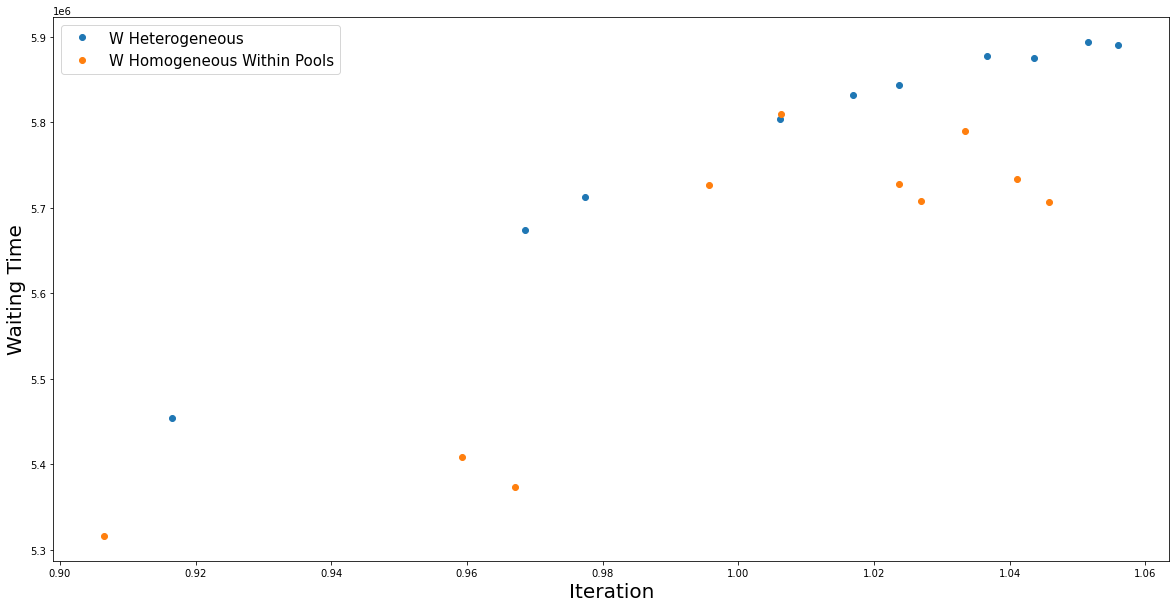

In [54]:
 comparing_routing("Served", "")